In [2]:
#Phase 2

#Use KMeans algorithm (do not use column CLASS) 

import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

#continue working with cleaned breast cancer data from the phase 1

df = pd.read_csv("data/Breast-Cancer-Wisconsin.csv") 
df["A7"] = df["A7"].replace('?', np.NaN) #Replace ? by NaN in column A7
df["A7"] = pd.to_numeric(df['A7']) #Apply pandas function pd.to_numeric() for column A7
df = df.fillna(df["A7"].mean(skipna=True)) #Replace NaN values with the mean of column A7

In [3]:
new_df = df.loc[:, 'A2':'A10'] #use only columns A2-A10

In [4]:
from sklearn.cluster import KMeans #import KMeans - use sklearn.cluster

In [5]:
#assign columns
X = np.array(new_df)
a2 = X[:,0]
a3 = X[:,1]
a4 = X[:,2]
a5 = X[:,3]
a6 = X[:,4]
a7 = X[:,5]
a8 = X[:,6]
a9 = X[:,7]
a10 = X[:,8]

In [6]:
model = KMeans(n_clusters=4) #create KMeans model for n_cluster = 4

In [7]:
model.fit(X) # fit model to your data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
centroids = model.cluster_centers_ #calculate centroids
print(centroids) #print centroids - you should have a matrix with 4 row (4 clusters) and 9  columns (for each A column)

[[ 7.46478873  7.02816901  6.67605634  4.1971831   5.53521127  3.45322005
   5.38028169  6.81690141  2.30985915]
 [ 2.94493392  1.24449339  1.36563877  1.29295154  2.03964758  1.3514006
   2.06167401  1.20044053  1.07709251]
 [ 6.7625      8.3875      8.425       7.75        6.775       9.2125
   7.375       7.7375      3.7875    ]
 [ 7.23404255  4.85106383  5.04255319  4.86170213  4.11702128  9.38297872
   5.26595745  3.78723404  1.64893617]]


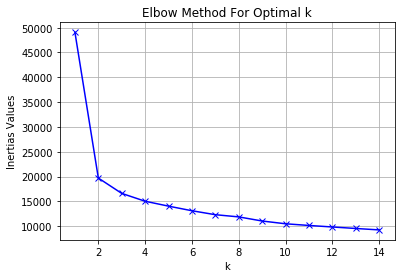

In [9]:
#Find the optimal number of clusters

ks = range(1,15) #create a range from 1 to 15 or more

inertias_values = [] #create an empty list for inertias values
K = range(1,15) #create a range from 1 to 15 or more
for k in K: #use for loop to calculate KMeans for each values
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inertias_values.append(kmeanModel.inertia_)
    
plt.plot(K, inertias_values, 'bx-') #plot range and inertia
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Inertias Values') #add title, ylabel, xlabel
plt.title('Elbow Method For Optimal k')
plt.show()


In [10]:
print ("The optimal number of clustes based on the inertia plot is 2")

The optimal number of clustes based on the inertia plot is 2


In [11]:
#Revise data variation

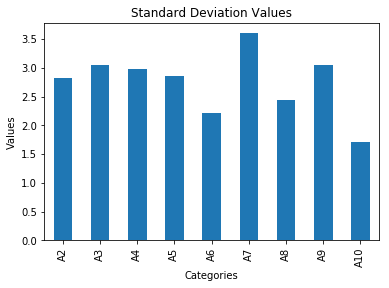

In [12]:
new_df_std = new_df.std ()#apply standard deviation function for columns A2-A10

new_df_std.plot.bar() # plot standard deviation values
plt.title('Standard Deviation Values')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

In [13]:
print('A7 column has a lof of variation')#describe which features have a lot of data variation

A7 column has a lof of variation


In [14]:
#Implement normalization

In [15]:
from sklearn.pipeline import make_pipeline #import make_pipeline - use sklearn.pipeline
from sklearn.preprocessing import StandardScaler #import StandardScaler
from sklearn.cluster import KMeans

In [16]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=2)
pipeline = make_pipeline(scaler, kmeans) #create a pipeline

In [17]:
# Fit the pipeline to samples
pipeline.fit(X)

# Calculate the cluster labels: labels
labels = pipeline.predict(X)

In [18]:
model2 = kmeans.fit(X) 

In [19]:
print(model2.cluster_centers_) #find centroids and print them

[[ 3.0472103   1.30257511  1.44635193  1.34334764  2.08798283  1.38000113
   2.10515021  1.26180258  1.10944206]
 [ 7.15879828  6.79828326  6.72961373  5.73390558  5.472103    7.87396553
   6.10300429  6.07725322  2.54935622]]


In [ ]:
#Phase 3

#Clusters - 5pts

In [29]:
kmeans = KMeans(n_clusters=2, n_init=20, max_iter=500) #Change iteration to 500 and initial centroids to 20

In [34]:
kmeans.fit(X) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
print(kmeans.cluster_centers_)

[[ 7.15879828  6.79828326  6.72961373  5.73390558  5.472103    7.87396553
   6.10300429  6.07725322  2.54935622]
 [ 3.0472103   1.30257511  1.44635193  1.34334764  2.08798283  1.38000113
   2.10515021  1.26180258  1.10944206]]


In [36]:
labels = kmeans.fit_predict(X)#Save predicted clusters into a variable labels

In [38]:
# DataFrame - 5pt

In [68]:
new_df['CLASS'] = df['CLASS']

In [69]:
new_df['Kmean labels'] = labels #Create a new column in your dataframe and add Kmeans labels.

In [70]:
new_df['Kmean labels'] = new_df['Kmean labels'].replace(0, 2) #Change labels values so that 0 becomes 2

In [72]:
new_df['Kmean labels'] = new_df['Kmean labels'].replace(1, 4) #Change labels values so that 1 becomes 4

In [73]:
new_df.head(15)#Print the first 15 records from your dataframe

,A2,A3,A4,A5,A6,A7,A8,A9,A10,Kmean labels,CLASS
0,5,1,1,1,2,1.0,3,1,1,2,2
1,5,4,4,5,7,10.0,3,2,1,4,2
2,3,1,1,1,2,2.0,3,1,1,2,2
3,6,8,8,1,3,4.0,3,7,1,4,2
4,4,1,1,3,2,1.0,3,1,1,2,2
5,8,10,10,8,7,10.0,9,7,1,4,4
6,1,1,1,1,2,10.0,3,1,1,2,2
7,2,1,2,1,2,1.0,3,1,1,2,2
8,2,1,1,1,2,1.0,1,1,5,2,2
9,4,2,1,1,2,1.0,2,1,1,2,2


In [127]:
#Error Rate Function - 15 pts

#Note: 2 - benign cells; 4 - malign cells

# Error for benign cells

predicted_labels = new_df['Kmean labels'].value_counts() 
actual_class_labels = new_df['CLASS'].value_counts() 


predicted_labels_4 = predicted_labels[4] #total number of points with predicted labels = 4

In [84]:
print ("Total number of points with predicted labels '4' is: ",predicted_labels_4)

Total number of points with predicted labels '4' is:  233


In [79]:
labels_class = new_df.groupby('Kmean labels')['CLASS'].value_counts()

In [87]:
B = labels_class[4][2] # B = total number of points with predicted labels = 4 that correspond to CLASS = 2

In [88]:
print ("Total number of points with predicted labels '4' that correspond to CLASS '2' is: ",B)

Total number of points with predicted labels '4' that correspond to CLASS '2' is:  11


In [89]:
predicted_labels_2 = predicted_labels[2] #total number of points with predicted labels = 4#total number of predicted labels = 2

In [90]:
print ("Total number of points with predicted labels '2' is: ",predicted_labels_2)

Total number of points with predicted labels '2' is:  466


In [92]:
error_B = B / predicted_labels_2 #total number of points with predicted labels = 4 that correspond to CLASS = 2 / total number of predicted labels = 2

In [95]:
#Error for malign cells

M = labels_class[2][4] #total number of points with predicted labels = 2 that correspond to CLASS = 4 
error_M = M/predicted_labels_4 #total number of points with predicted labels = 2 that correspond to CLASS = 4 / total number of predicted labels = 4

In [140]:
#Total error rate
total_data_points = sum(labels_class)
T = (M + B) #total number of datapoints with predicted labels (labels column) Not equal to actual class 
total_error_rate = T / total_data_points #total number of datapoints with predicted labels Not equal to (CLASS column) / total number of datapoints

print("Error rate for benign:", error_B,", Error rate for malign:", error_M, ", Total error rate:",total_error_rate ) # print out the error rate values.

Error rate for benign: 0.0236051502146 , Error rate for malign: 0.0815450643777 , Total error rate: 0.0429184549356


In [ ]:
#Report - 5pts

#Add your report statement (~150-200 words): your reflection on the final project results